In [11]:
# imports
import sys
import os
import pickle
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)
from functions_EDX import *

from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

import tifffile as tif
import pacmap

In [2]:
# sub-routine to get file names
def get_file_paths(spectrum_folder):
    file_names = []
    tmp = os.listdir(spectrum_folder)
    for filename in tmp:
        if filename.endswith('.npz'):
            file_names.append(filename)
    
    file_names = sorted(file_names)
    files = [os.path.join(spectrum_folder,file_name) for file_name in file_names]
    return files

### Load data

In [4]:
supp_file_path = '/Users/AJ/Desktop/PACMAP_RESULTS/Identify2/pacpam_instance/pacmap_panc_euc_20percent_SavedTree20240209-105636.npz'
abundance_maps = np.load(supp_file_path)['abundance_maps']
abundance_maps = abundance_maps / np.max(abundance_maps) # Scale to have max coefficient = 1
colors = np.load(supp_file_path)['colors']
colors[0] = [0,0,0]

# choose a tile
tile_idx = 8

# location of SAM masks
masks_path = '/Users/AJ/Desktop/work/PostDoc_UMCG/work/analysis/EDX_Project/primary_data/main_mosaic_6by5/SAM_masks/'

# get HAADF img
spectrum_folder = '/Volumes/Microscopy3/EDX_data/Identify/main_mosaic_6by5/NPZ/'
files = get_file_paths(spectrum_folder)
haadf = rebin_XY(np.load(files[tile_idx])['haadf'],1024)

In [7]:
colors

array([[0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 1.        , 0.        ],
       [0.96078431, 0.50980392, 0.18823529],
       [0.        , 1.        , 1.        ],
       [1.        , 0.        , 1.        ],
       [0.54117647, 0.16862745, 0.88627451],
       [0.        , 0.        , 1.        ],
       [0.39215686, 0.58431373, 0.92941176],
       [0.80784314, 0.57647059, 0.84705882],
       [0.62352941, 0.88627451, 0.74901961]])

### Abundance maps of a granule

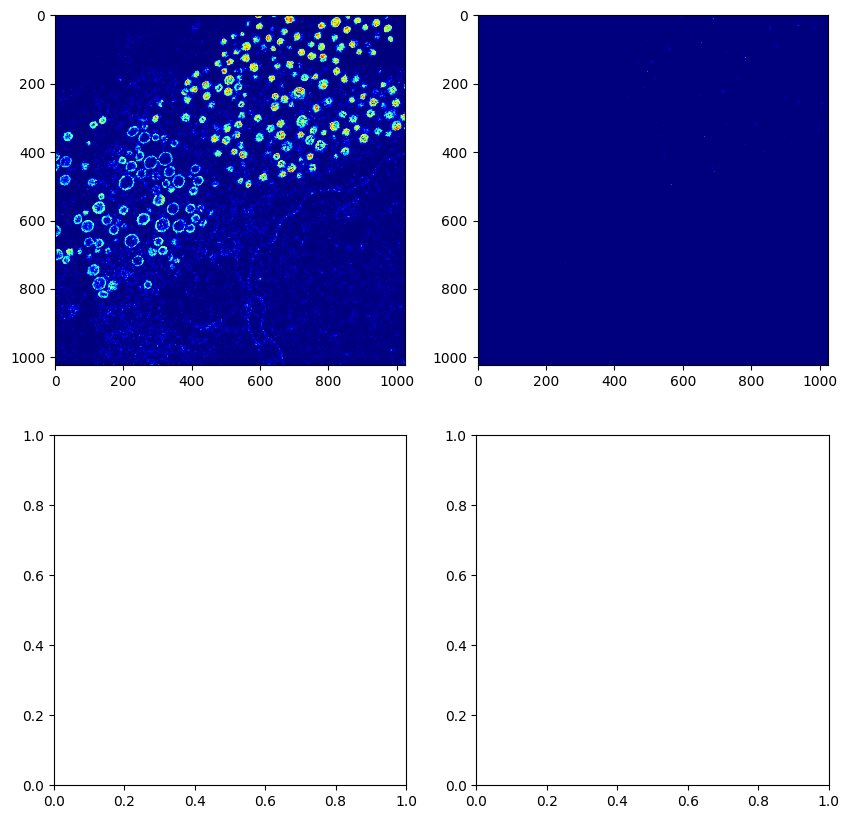

In [27]:
structure_idx = 5

abundance_map = abundance_maps[structure_idx,:,:,tile_idx]

f, ax = plt.subplots(2,2,figsize = (10,10))
ax[0][0].imshow(abundance_map,cmap='jet')
ax[0][1].imshow(abundance_map>0.85,cmap='jet')


In [31]:
counts, xedges, yedges = np.histogram2d(abundance_map[0,:], abundance_map[1,:], bins=512)
print(counts)
#print(xedges)
#print(yedges)

[[853.   1.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  1.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [25]:
counts.shape

(512, 512)

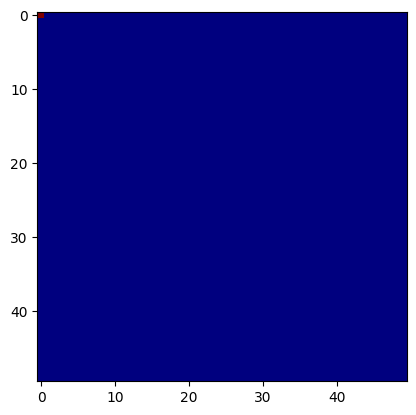

In [29]:
plt.imshow(counts[:50,:50],cmap='jet')